In [1246]:
#Erez Sarousi
#Professor Werner
#DSC550 Data Mining
#Bellevue University
#5/23/2021

In [1247]:
#Explanation of project and graphs.
with open("M4.txt", "r"):
    print(open("M4.txt", "r").read())

This Milestone will feature all Milestones fom Milestones 1 to now, in order to display everything with the added advantage of all the information I learned throughout this class. Furthermore, I will explain my processes to greater detail. Thank you.

The Business Problem:

In a concise sentence, how do we improve the iPhone?

I am a data scientist at Apple, and I have been tasked to point out all concerns and points of opportunity regarding previous iphones from Amazon review's datasets. My plan, with this dataset, is that I will isolate and categorize the topic that is being mentioned through this dataset by picking up on certain keywords. There are currently eight different aspects that are being examined by the phones.

These aspects are: Appearance, Battery, Screen, Software, Music, Storage, Camera and Speed.

Sentiment analysis will be conducted and examined to truly understand what the weak points of the phones are. The idea is that once weak points are isolated, different depar

In [1431]:
from keras.preprocessing.text import text_to_word_sequence, one_hot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import re
import scipy
import seaborn as sns
from sklearn import linear_model
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.testing import ignore_warnings
scaler = StandardScaler()
from textblob import TextBlob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=ConvergenceWarning)
from yellowbrick.features import Rank2D

# Loading Relevant DataFrames and Preparing Data For Use

In [1249]:
#Loading dataframes
items = pd.read_csv('20191226-items.csv')
reviews = pd.read_csv('20191226-reviews.csv')

In [1250]:
#Examining the items dataframe
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [1251]:
#Finding summary statistics in the dataframe.
items.describe()

,rating,totalReviews,price,originalPrice
count,720.000000,720.000000,720.000000,720.000000
mean,3.713750,105.679167,234.948931,63.690778
std,0.716014,167.601101,200.008441,172.405370
min,1.000000,1.000000,0.000000,0.000000
25%,3.300000,7.000000,97.512500,0.000000
50%,3.800000,32.000000,188.975000,0.000000
75%,4.100000,122.250000,336.725000,0.000000
max,5.000000,983.000000,999.990000,999.990000


In [1465]:
#Examining the reviews dataframe.
reviews.sample(n=5)

,asin,name,rating,date,verified,title,body,helpfulVotes
6725,B00D99ZBR6,Katrina Best,3,"October 13, 2016",True,Slow basic smartphone,This a small phone and not what my son wanted....,NaN
32831,B06XSF5C42,Luis Machado,5,"February 3, 2019",True,la calidad y la rapidez,todo genial llego a tiempo pero con defecto y ...,NaN
22913,B01DZ2CS4U,peter jimenez,5,"October 22, 2017",True,Five Stars,grate phone love it,NaN
15479,B00V7FY44A,Amanda Hartfiel,5,"December 10, 2015",True,LOVE THIS PHONE!,This phone is amazing! I have yet to find some...,NaN
64314,B07V5KS95Y,drolson9,4,"October 30, 2019",True,Was expecting more for the money.,I like the phone but I guess i was expecting s...,NaN


In [1253]:
#Examining the summary statistics for the reviews dataframe.
reviews.describe()

,rating,helpfulVotes
count,67986.000000,27215.000000
mean,3.807916,8.229690
std,1.582906,31.954877
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.000000,2.000000
75%,5.000000,5.000000
max,5.000000,990.000000


In [1254]:
#Finding all iphone 8 entries
AP = items['title'].str.lower().str.find('iphone')!=-1

In [1255]:
#Seeing how many matches exist.
AP.sum()

56

In [1256]:
#creating a new df based on the search.
items_df = items.loc[AP]

In [1257]:
#Seeing the list of different options.
items_df['url']

119    https://www.amazon.com/Apple-iPhone-Plus-Unloc...
129    https://www.amazon.com/Apple-iPhone-6S-Unlocke...
152    https://www.amazon.com/Apple-iPhone-Unlocked-P...
163    https://www.amazon.com/Apple-iPhone-6s-Plus-16...
170    https://www.amazon.com/Apple-iPhone-6S-Unlocke...
188    https://www.amazon.com/Apple-iPhone-6S-AT-16GB...
189    https://www.amazon.com/Apple-iPhone-Unlocked-Q...
192    https://www.amazon.com/Apple-iPhone-GSM-Unlock...
196    https://www.amazon.com/Apple-iPhone-GSM-Unlock...
204    https://www.amazon.com/Apple-iPhone-Fully-Unlo...
205    https://www.amazon.com/Apple-iPhone-Plus-Unloc...
208    https://www.amazon.com/Apple-iPhone-6S-Fully-U...
209    https://www.amazon.com/Apple-iPhone-Fully-Unlo...
210    https://www.amazon.com/Apple-iPhone-Fully-Unlo...
211    https://www.amazon.com/Apple-iPhone-Unlocked-D...
212    https://www.amazon.com/Apple-iPhone-256GB-Unlo...
213    https://www.amazon.com/Apple-iPhone-128GB-Unlo...
215    https://www.amazon.com/A

In [1505]:
#merging the two dataframes based on the asin.
apple = pd.merge(items_df,reviews, on='asin')
#Dropping nan values.
apple = apple.dropna()

In [1259]:
#Reviewing the new dataframe
apple.sample(n=2)

,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
3152,B077578VXH,Apple,"Apple iPhone 8, GSM Unlocked, 64GB - Gold (Ren...",https://www.amazon.com/Apple-iPhone-GSM-Unlock...,https://m.media-amazon.com/images/I/41mOeuE1OT...,4.2,https://www.amazon.com/product-reviews/B077578VXH,72,299.00,319.99,Frankie Richardson,5,"August 16, 2019",True,Exactly what I paid for!!!,Ignore all the bad reviews ! I got my IPhone 8...,22.0
2231,B0731HBTZ7,Apple,"Apple iPhone 7 32GB, Rose Gold (Renewed)",https://www.amazon.com/Apple-iPhone-32GB-Rose-...,https://m.media-amazon.com/images/I/51cRE43zKw...,3.8,https://www.amazon.com/product-reviews/B0731HBTZ7,452,199.95,210.00,RaeRae,2,"July 30, 2019",True,I didn’t get my phone,I didn’t get my phone,1.0


In [1260]:
#Describing the newly formed apple dataframe
apple.describe()

,rating_x,totalReviews,price,originalPrice,rating_y,helpfulVotes
count,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000
mean,3.858373,258.274175,360.173190,178.950342,3.195755,20.048349
std,0.225487,154.978597,166.541608,253.163348,1.818783,62.546493
min,1.000000,1.000000,133.550000,0.000000,1.000000,1.000000
25%,3.800000,153.000000,199.277500,0.000000,1.000000,1.000000
50%,3.900000,230.000000,349.800000,0.000000,4.000000,2.000000
75%,4.000000,436.000000,479.000000,271.840000,5.000000,7.000000
max,4.600000,452.000000,949.000000,749.990000,5.000000,990.000000


In [1261]:
#Checking out the shape of the dataframe.
apple.shape

(1696, 17)

In [1507]:
#Deleting erroneous columns.
del apple['image']
del apple['url']
del apple['reviewUrl']
del apple['price']
del apple['name']
del apple['rating_x']

In [1508]:
#Renaming columns.
apple.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple['Date'] = pd.to_datetime(apple['Date']) #Reformatting date/time format.
apple.sample(n=2)

,Item #,Brand,Model,Reviews,Price,Rating,Date,Verified,Review Title,Review,Helpful
590,B06XR1K6HR,Apple,"Apple iPhone 6S Plus, 64GB, Rose Gold - For AT...",56,0.00,5,2017-06-08,True,Five Stars,"Arrived quickly, just as described!",1.0
2665,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-M...",436,749.99,5,2019-06-27,True,Lavable,Lovable 5 stars. Works perfect 🙏😁,8.0


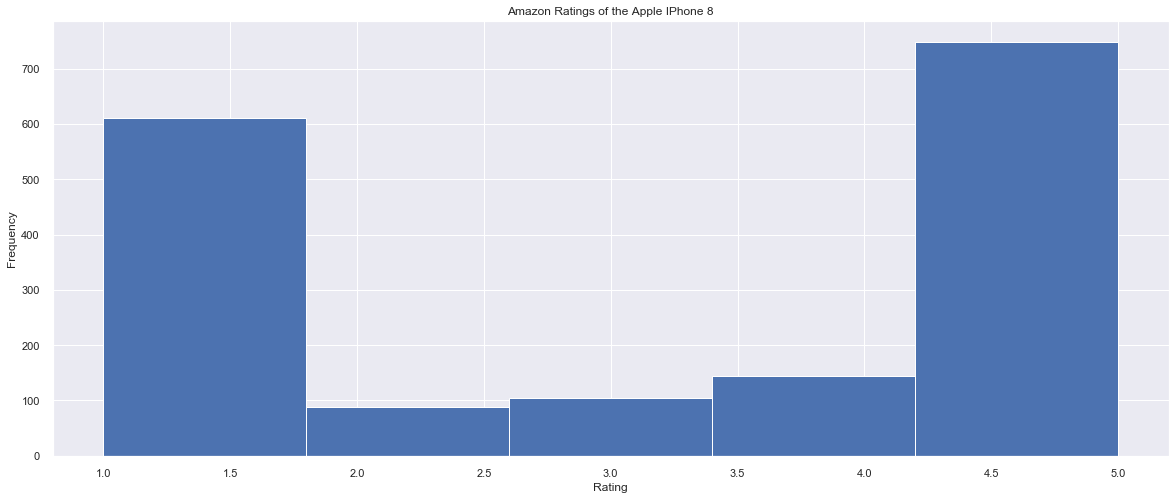

In [1509]:
#Learning about the distribution of the reviews
plt.hist(apple['Rating'],bins=5)
plt.title("Amazon Ratings of the Apple IPhone 8")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

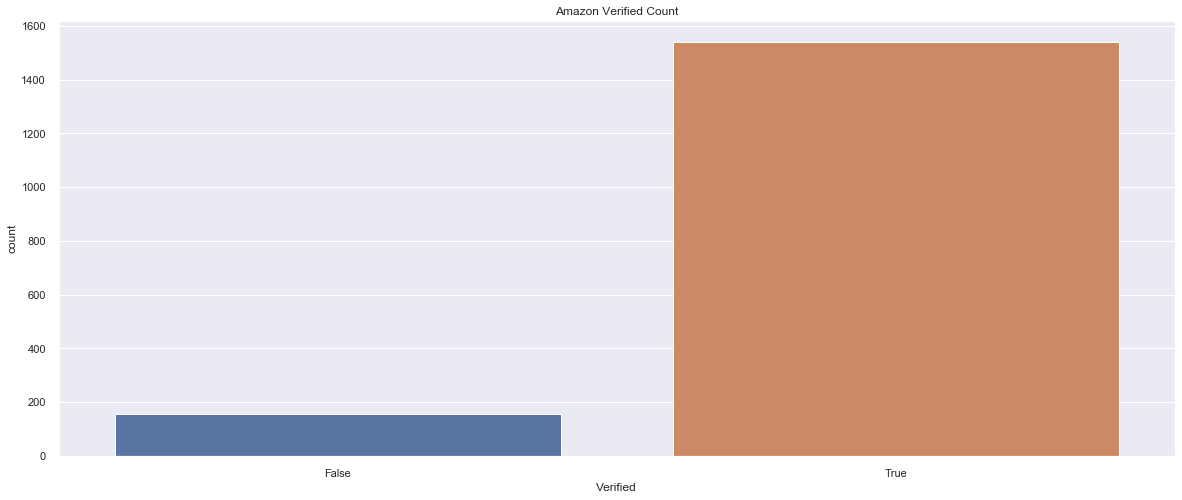

In [1510]:
#Seeing how many of these ratings are from a verified source - bar chart.
plt.title('Amazon Verified Count')
sns.countplot(x="Verified", data=apple)

In [1512]:
apple.shape

(1696, 11)

In [1513]:
apple.head()

,Item #,Brand,Model,Reviews,Price,Rating,Date,Verified,Review Title,Review,Helpful
0,B01AUOS8BI,Apple,"Apple iPhone 6S Plus, 128GB, Rose Gold - For A...",7,0.00,5,2018-10-26,True,Great,Great! Minor scratches on the screen but its b...,7.0
1,B01AUOS8BI,Apple,"Apple iPhone 6S Plus, 128GB, Rose Gold - For A...",7,0.00,1,2018-12-27,True,No good,"I hace ti return it, it doesn’t work at all",3.0
2,B01AUOS8BI,Apple,"Apple iPhone 6S Plus, 128GB, Rose Gold - For A...",7,0.00,1,2019-06-15,True,"Trash battery, phone, and touch recognition.",I do not like the battery. The battery jumped ...,1.0
5,B01CR1FQMG,Apple,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",1,659.99,5,2017-04-03,True,All good so far.,"TLDR: Great phone, looks new. Pay attention to...",1.0
6,B01CR1FQMG,Apple,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",1,659.99,1,2018-09-23,True,Do NOT buy from this company!!! They’re produc...,This will be the 3rd iPhone 6s I have had to r...,209.0


In [1502]:
def translate(x):
    try:
        if pd.isna(x) == False:
            return TextBlob(x.strip()).translate(to='en')
        return(x)
    except:
        return(x)
        
apple['Review'] = apple['Review'].apply(translate)

In [1516]:
apple['Review'].head()

0    Great! Minor scratches on the screen but its b...
1          I hace ti return it, it doesn’t work at all
2    I do not like the battery. The battery jumped ...
5    TLDR: Great phone, looks new. Pay attention to...
6    This will be the 3rd iPhone 6s I have had to r...
Name: Review, dtype: object

In [ ]:
### Sentiment Analysis:
#Lowering the casing.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
apple.sample(n=2)

In [ ]:
#Removing punctuation.
apple['Review'] = apple['Review'].map(lambda x: re.sub(r'\W+', ' ', x))
apple.sample(n=2)

In [ ]:
#Removing stop words.
stop = stopwords.words('english') #stop words = English.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
apple.sample(n=2)

In [ ]:
#Word tokenizing
apple['Review'] = apple['Review'].apply(word_tokenize) 
apple.sample(n=2)

In [ ]:
#word stemming
stemmer = PorterStemmer()
apple['Review'] = apple['Review'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
apple.sample(n=2)

In [ ]:
with open("M4-1.txt", "r"):
    print(open("M4-1.txt", "r").read())

# Splitting the dataframe to review several aspects.

In [ ]:
#List of terms people would use to review.
Battery = ["battery", 'charge', 'juice', 'charging', 'talk time', 'hours', 'minutes', 'life', 'lasts']
Camera = ["camera", 'pixels', 'megapixels', 'pictures', 'video', 'facial', 'recognition', 'animoji', 'zoom', 'dual',
          'optical', 'front', 'rear', 'back', 'lens']
Speed = ['speed', 'fast', 'slow', 'quick', 'lag', 'ram']
Storage = ["storage", 'space', 'room', 'memory', 'gb', 'capacity', 'expandable']
Software = ["software", 'itunes', 'app store', 'app', 'ios', 'animoji', 'game', 'siri', 'touch screen']
Music = ["music", 'audio', 'song', 'sound', 'speaker']
Screen = ["screen", 'oled', 'led', 'lcd', 'scratch', 'widescreen', 'backlit', 'display', 'retina', 'glass', 'inch',
          'resolution', 'break', 'unbreakable', 'shatter', 'chip']
Appearance = ["color", "size", 'colour', 'case', 'looks', 'vibrant']

In [ ]:
#Searching all rows for items in the lists.
appe = apple[apple['Review'].str.lower().str.contains('|'.join(Appearance))]
batt = apple[apple['Review'].str.lower().str.contains('|'.join(Battery))]
came = apple[apple['Review'].str.lower().str.contains('|'.join(Camera))]
spee = apple[apple['Review'].str.lower().str.contains('|'.join(Speed))]
stor = apple[apple['Review'].str.lower().str.contains('|'.join(Storage))]
soft = apple[apple['Review'].str.lower().str.contains('|'.join(Software))]
musi = apple[apple['Review'].str.lower().str.contains('|'.join(Music))]
scre = apple[apple['Review'].str.lower().str.contains('|'.join(Screen))]

In [ ]:
#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 

In [ ]:
with open("M4-2.txt", "r"):
    print(open("M4-2.txt", "r").read())

# Appearance

In [ ]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
appe['Score'] = appe['Review'].apply(ss)
appe['Positivity'] = appe['Score'].apply(lambda x:x[0])
appe['Subjectivity'] = appe['Score'].apply(lambda x:x[1])
appe['Topic'] = 'Appearance'
appe.head()

In [ ]:
appe.describe()

In [ ]:
#Time series
ylist = ['Positivity', 'Subjectivity']
appe_ts = appe.plot(x='Date', y=ylist)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=appe)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=appe)

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(appe['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
sns.histplot(appe['Positivity'])

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(appe['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = appe[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [ ]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(appe['Rating'],appe['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(appe['Subjectivity'],appe['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(appe['Rating'],appe['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

In [ ]:
with open("M4-3.txt", "r"):
    print(open("M4-3.txt", "r").read())

# Battery

In [ ]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
batt['Score'] = batt['Review'].apply(ss)
batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
batt['Subjectivity'] = batt['Score'].apply(lambda x:x[1])
batt['Topic'] = 'Battery'
batt.sample(n=2)

In [ ]:
batt.describe()

In [ ]:
#Time series
batt_ts = batt.plot(x='Date', y=ylist)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=batt)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=batt)

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = batt[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [ ]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(batt['Rating'],batt['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(batt['Subjectivity'],batt['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(batt['Rating'],batt['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

# Camera

In [ ]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
came['Score'] = came['Review'].apply(ss)
came['Positivity'] = came['Score'].apply(lambda x:x[0])
came['Subjectivity'] = came['Score'].apply(lambda x:x[1])
came['Topic'] = 'Camera'
came.sample(n=2)

In [ ]:
came.describe()

In [ ]:
#Time series
came_ts = came.plot(x='Date', y=ylist)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=came)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=came)

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(came['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(came['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = came[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [ ]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(came['Rating'],came['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(came['Subjectivity'],came['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(came['Rating'],came['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

In [ ]:
with open("M4-4.txt", "r"):
    print(open("M4-4.txt", "r").read())

# Speed

In [ ]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
spee['Score'] = spee['Review'].apply(ss)
spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
spee['Subjectivity'] = spee['Score'].apply(lambda x:x[1])
spee['Topic'] = 'Speed'
spee.sample(n=2)

In [ ]:
spee.describe()

In [ ]:
#Time series
spee_ts = spee.plot(x='Date', y=ylist)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=spee)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=spee)

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(spee['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(spee['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = spee[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [ ]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(spee['Rating'],spee['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(spee['Subjectivity'],spee['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(spee['Rating'],spee['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

In [ ]:
with open("M4-5.txt", "r"):
    print(open("M4-5.txt", "r").read())

# Storage

In [ ]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
stor['Score'] = stor['Review'].apply(ss)
stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
stor['Subjectivity'] = stor['Score'].apply(lambda x:x[1])
stor['Topic'] = 'Storage'
stor.sample(n=2)

In [ ]:
stor.describe()

In [ ]:
#Time series
stor_ts = stor.plot(x='Date', y=ylist)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=stor)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=stor)

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(stor['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(stor['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = stor[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [ ]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(stor['Rating'],stor['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(stor['Subjectivity'],stor['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(stor['Rating'],stor['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

In [ ]:
with open("M4-6.txt", "r"):
    print(open("M4-6.txt", "r").read())

# Software

In [ ]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
soft['Score'] = soft['Review'].apply(ss)
soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
soft['Subjectivity'] = soft['Score'].apply(lambda x:x[1])
soft['Topic'] = 'Storage'
soft.sample(n=2)

In [ ]:
soft.describe()

In [ ]:
#Time series
soft_ts = soft.plot(x='Date', y=ylist)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=soft)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=soft)

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(soft['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(soft['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = soft[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [ ]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(soft['Rating'],soft['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(soft['Subjectivity'],soft['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(soft['Rating'],soft['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

In [ ]:
with open("M4-7.txt", "r"):
    print(open("M4-7.txt", "r").read())

# Music

In [ ]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
musi['Score'] = musi['Review'].apply(ss)
musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
musi['Subjectivity'] = musi['Score'].apply(lambda x:x[1])
musi['Topic'] = 'Music'
musi.sample(n=2)

In [ ]:
musi.describe()

In [ ]:
#Time series
musi_ts = musi.plot(x='Date', y=ylist)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=musi)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=musi)

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(musi['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(musi['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = musi[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [ ]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(musi['Rating'],musi['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(musi['Subjectivity'],musi['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(musi['Rating'],musi['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

In [ ]:
with open("M4-8.txt", "r"):
    print(open("M4-8.txt", "r").read())

# Screen

In [ ]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
scre['Score'] = scre['Review'].apply(ss)
scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
scre['Subjectivity'] = scre['Score'].apply(lambda x:x[1])
scre['Topic'] = 'Screen'
scre.sample(n=2)

In [ ]:
scre.describe()

In [ ]:
#Time series
scre_ts = scre.plot(x='Date', y=ylist)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=scre)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=scre)

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(scre['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(scre['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = scre[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [ ]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(scre['Rating'],scre['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(scre['Subjectivity'],scre['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(scre['Rating'],scre['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

In [ ]:
with open("M4-9.txt", "r"):
    print(open("M4-9.txt", "r").read())

# Merging the dataframes together again.

In [ ]:
#Merging the dataframes in one..
a_df = [appe, batt, came, spee, stor, soft, musi, scre]
a_df = pd.concat(a_df, axis=0, join='inner').reset_index()

In [ ]:
a_df.sample(n=2)

In [ ]:
a_df.describe()

In [ ]:
#Time series info
a_df_ts = a_df.plot(x='Date', y=ylist)

In [ ]:
#Time series info
# ylist2 = ['appe','batte','soft','came','musi','spee', 'scre', 'stor']
# a_df_ts = a_df.plot(x='Date', y=ylist2)
sns.lineplot(data=a_df,x='Date',y="Positivity",hue="Topic",palette='bright',lw=1)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Subjectivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=a_df)

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(a_df['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(a_df['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [ ]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = a_df[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://adf.png") # Draw/show/poof the data

In [ ]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(a_df['Rating'],a_df['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(a_df['Subjectivity'],a_df['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(a_df['Rating'],a_df['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

In [ ]:
sns.set(rc={'figure.figsize':(16,11)})
sns.boxplot(x="Topic", y='Positivity', data=a_df, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})

In [ ]:
name = ['Appearance','Battery','Camera','Speed','Storage','Software','Music','Screen']
topic = [appe,batt,came,spee,stor,soft,musi,scre]
for x, y in zip(topic,name):
    print ("The Positivity Mean of "+ y + " is: "+ str(round(x['Positivity'].mean(), 3)))

In [ ]:
with open("M4-10.txt", "r"):
    print(open("M4-10.txt", "r").read())

In [ ]:
a_df.sample(n=2)

# Neural Networking 

In [ ]:
a_df.head()

In [ ]:
#Cleaning the new datasets of columns we no longer need.
del a_df['Model']
del a_df['index']
del a_df['Date']
del a_df['Score']
del a_df['Brand']
del a_df['Reviews']
del a_df['Price']
del a_df['Rating']
del a_df['Review Title']
del a_df['Helpful']
del a_df['Verified']
a_df.sample(n=2)

In [ ]:
corpus = '' #an empty string to update.
for idx, value in a_df['Review'].iteritems():
    corpus += ' '+value #adding all values to the corpus.
corpuswords = text_to_word_sequence(corpus) #Using text to word sequence to isolate the words.
wordset = set(corpuswords) #Using a set to remove all duplicates.
codedwords = one_hot(corpus,len(wordset)+1) #Encoding all words to individualized numbers.

In [ ]:
len(codedwords) == len(corpuswords)
#Ensuring the lengths match to prevent errors.

In [ ]:
code_dict = {k:v for k,v in zip(corpuswords,codedwords)}
#Creating a dictionary to link the words to the codes.

In [ ]:
colcodes = []
num_codes = []

for idx,value in a_df['Review'].iteritems():
    valuewords = text_to_word_sequence(value)
    codelist = []
    for word in valuewords:
        code = code_dict[word]
        codelist.append(code)
    colcodes.append(codelist)
    num_codes.append(len(codelist))
    
print(max(num_codes))
a_df['Code'] = colcodes

In [ ]:
a_df_columns = ['Word_'+str(i) for i in range(a_df['Code'].str.len().max())]
#Adding a new column for every column up until the maximum amount of codes.

In [ ]:
code_df = pd.DataFrame(a_df['Code'].tolist(),columns = a_df_columns)
#Adding those columns to the dataframe.

In [ ]:
code_df.sample(n=2)

In [ ]:
code_df.fillna(0, inplace=True) #Filling all empties with 0s.

In [ ]:
code_df['Topic'] = a_df.reset_index()['Topic'] #Readding the categories column.

In [ ]:
code_df.sample(n=2)

In [ ]:
code_df['Topic'].loc[code_df['Topic']=='Appearance']=1
code_df['Topic'].loc[code_df['Topic']=='Battery']=2
code_df['Topic'].loc[code_df['Topic']=='Camera']=3
code_df['Topic'].loc[code_df['Topic']=='Speed']=4
code_df['Topic'].loc[code_df['Topic']=='Storage']=5
code_df['Topic'].loc[code_df['Topic']=='Software']=6
code_df['Topic'].loc[code_df['Topic']=='Music']=7
code_df['Topic'].loc[code_df['Topic']=='Screen']=8
#Coding the categories into integers.

In [ ]:
code_df.sample(n=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(code_df, code_df['Topic'], test_size = 0.20)
#Separating the codes into training and test models. The training comprises 20% now.

In [ ]:
X_train
#Examining the training model.

In [ ]:
#Scaling and transforming the training and test.
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
#Changing the type to allow for acceptance.

In [ ]:
y_train_dummies = pd.get_dummies(y_train)

In [ ]:
y_train_dummies.head()

In [ ]:
nn = MLPClassifier(activation='logistic')
#Saving the classifier to a variable.

In [ ]:
nn.fit(X_train,y_train_dummies) #Fitting the model.

In [ ]:
y_pred = nn.predict(X_test)
#Predicting the model.

In [ ]:
y_pred

In [ ]:
cross_val_score(nn,X_train,y_train)
#Evaluating the model.

# Categorical transformation and hyperparameter tuning

In [ ]:
#Get dummies categorical values binary
categorical = ['Topic','Item #']
a_df_cat = pd.get_dummies(a_df[categorical],drop_first=True)
a_df_cat.head()

In [ ]:
#Listing the columns
list(a_df_cat.columns)

In [ ]:
#Getting the list from columns
a_df[list(a_df_cat.columns)] = a_df_cat[list(a_df_cat.columns)]

In [ ]:
#Reviewing the new dataset
a_df.sample(n=2)

In [ ]:
#Cleaning the new datasets of columns we no longer need.
del a_df['Item #']
del a_df['Model']
del a_df['Review']
del a_df['Topic']
del a_df['index']
del a_df['Date']
a_df.sample(n=2)

In [ ]:
del a_df['Score']
a_df['Price'] = a_df['Price']/a_df['Price'].max()
a_df['Rating'] = a_df['Rating']/a_df['Rating'].max()
a_df.head()

In [ ]:
#Creating a list and looping through to format.
a_df_list = list(a_df_cat.columns)+['Price',"Rating",'Subjectivity']

for x in a_df_list:
    x = 'a_df["'+x+'"]'

In [ ]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[a_df_list], a_df["Positivity"])
coef = regr.coef_.tolist()

In [ ]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

In [ ]:
max_val=max(coef)
min(coef)

In [ ]:
important_features = []

for coe,f_name in zip(coef,a_df_list):
    if abs(coe) > max_val/1000:
        important_features.append(f_name)
        
print(important_features)

In [ ]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[important_features], a_df["Positivity"])
coef = regr.coef_.tolist()

In [ ]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(important_features,coef):
    y=str(y)
    print(x+": "+ y)

In [ ]:
lasso_model = Lasso(alpha=.001)
lasso_model.fit(a_df[a_df_list],a_df['Positivity'])

coef = lasso_model.coef_.tolist()
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+ y)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B07RT1X4FJ',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B07KKL5KGG',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B07D6TQP6F',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B079HB518K',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B077578W38',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B07643YNY8',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B0731HBTZ7',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B06XRJXL3R',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B06XRG6S73',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Item #_B06XR1K6HR',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Topic_Storage',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Topic_Battery',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Rating',y="Positivity",data=a_df)

In [ ]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=a_df)

In [ ]:
LR = LogisticRegression(a_df_list)
LR

In [ ]:
with open("M4-11.txt", "r"):
    print(open("M4-11.txt", "r").read())

# Conclusion

In [ ]:
#Explanation of project and graphs.
with open("M4-12.txt", "r"):
    print(open("M4-12.txt", "r").read())